In [9]:
from pathlib import Path
from pyexplain.benchmark.file_utils import *
from pyexplain.benchmark.plot import *
import IPython
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.weight']= 'bold'

# MAC
# MAC
environment = 'MAC'
BASE_MAC_LINUX = {
    'MAC': '/Users/emiliogamba/Documents/01_VUB/01_Research/01_Shared_Projects',
    'LINUX': '/home/emilio/research/'
}

PATH_FIGURES_POST_PAPER = Path(BASE_MAC_LINUX[environment] + "01_holygrail/latex/journal/jair21/figures/")
EXPERIMENT_RESULTS = Path(BASE_MAC_LINUX[environment] + "06_HPC_Experiments/experiments/data/output/")
BASE_OUTPUT_PATH = BASE_MAC_LINUX[environment] + "/06_HPC_Experiments/experiments/data/output/"
REMOTE_EXPERIMENT_RESULTS = "/data/brussel/101/vsc10143/hpc_experiments2/experiments/data/output/"

In [10]:
DISABLE_KILLER_INSTANCES = False

# RQ2 Which domain specific grow improve the overall runtime?

using the cumulative runtime computed directly for the new dataset

In [11]:
mus_output_folders = [
    "MUS/2022030116/"
]


path_mus = [BASE_OUTPUT_PATH + o for o in mus_output_folders]

df_mus = folder_to_pandas_df_pickle(path_mus)

if DISABLE_KILLER_INSTANCES:
    df_mus = df_mus[~df_mus["params_instance"].str.contains("killer")] .reset_index()

df_mus = corr_enhance_df(df_mus)

renaming_expl_config = {
    "MUS": "MUS",
    "OCUS":"OCUS+Incr. HS",
    "OCUS_NOT_INCREMENTAL":"OCUS",
    "OUS_INCREMENTAL_NAIVE":"OUSb+Lit. Incr. HS",
    "OUS_INCREMENTAL_NAIVE_PARALLEL": "OUS Iter.+Lit. Incr. HS",
    "OUS_NAIVE_PARALLEL":"OUS Iter.",
    "OUS_SS": "OUSb"
}


df_mus["explanation config"] = df_mus.apply(lambda row: renaming_expl_config[row["params_explanation_computer"]], axis=1)
df_mus["tot_lits_derived"] = df_mus.apply(lambda row: sum(row["lits_derived"]), axis=1)
df_mus["params_grow_config"] = df_mus.apply(lambda row: "MUS", axis=1)

# all_instances = set(df_mus["params_instance"])
# all_instances_no_killer = [i for i in all_instances if "killer" not in i]


/home/emilio/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/emilio/.local/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [12]:
all_grows_output_folders = [
    "RQ2_LOGIC_SUDOKU_PUZZLES/2022021411/",
    "RQ2_LOGIC_SUDOKU_PUZZLES_MAXSAT_FULL/2022021708/",
    "RQ2_DEMYSTIFY_PUZZLES/2022021714",
    "RQ2_DEMYSTIFY_PUZZLES_MAXSAT_FULL/2022021708/",
    "RQ2c_DEMYSTIFY_SUDOKU_PUZZLES/2022022508/",
    "RQ2c_DEMYSTIFY_PUZZLES/2022022508/",
    ## re-run up until here!
    "RQ2_MISSING_PUZZLES/2022030215/",
    "RQ2_MISSING_PUZZLES/2022031010/"
]

path_all_grows_output_dirs = [BASE_OUTPUT_PATH + o for o in all_grows_output_folders]

df_all_grows = folder_to_pandas_df_pickle(path_all_grows_output_dirs)

if DISABLE_KILLER_INSTANCES:
    df_all_grows = df_all_grows[~df_all_grows["params_instance"].str.contains("killer")] .reset_index()

## These instances are ignored because their first step derives a lot 100+ literals at once, which doesn't
df_all_grows = corr_enhance_df(df_all_grows)

renaming_expl_config = {
    "MUS": "MUS",
    "OCUS":"OCUS+Incr. HS",
    "OCUS_NOT_INCREMENTAL":"OCUS",
    "OUS_INCREMENTAL_NAIVE":"OUSb+Lit. Incr. HS",
    "OUS_INCREMENTAL_NAIVE_PARALLEL": "OUS Iter.+Lit. Incr. HS",
    "OUS_NAIVE_PARALLEL":"OUS Iter.",
    "OUS_SS": "OUSb"
}

##
df_all_grows["tot_lits_derived"] = df_all_grows.apply(lambda row: sum(row["lits_derived"]), axis=1)
df_all_grows["explanation config"] = df_all_grows.apply(lambda row: renaming_expl_config[row["params_explanation_computer"]], axis=1)
df_all_grows["HS"] = df_all_grows.apply(lambda row: row["tot_n_hs"], axis=1)

## removing MUS from those results
df_all_configs_no_mus = df_all_grows[
    (df_all_grows["explanation config"].isin([
        "OCUS+Incr. HS",
        "OUSb+Lit. Incr. HS",
        "OUS Iter.+Lit. Incr. HS"])) & 
    (df_all_grows["params_grow_config"].isin([
        "Disj.MCSes + Actual + Unif.",
        "Greedy MCSes + Actual + Unif.",
        "MaxSAT + Actual + Unif.",
        "MaxSAT + Full + Unif.",
        "SAT"]))
]


TODO: Need to remove the duplicates from the results!!

In [13]:
from collections import Counter
df_all_grows_sel_cols = df_all_grows[["params_grow_config", "params_explanation_computer", "params_instance", "params_output"]]
all_instances = set(df_all_grows["params_instance"])
for expl_config in [
    'MUS',
     'OCUS',
     'OCUS_NOT_INCREMENTAL',
     'OUS_INCREMENTAL_NAIVE',
     'OUS_INCREMENTAL_NAIVE_PARALLEL',
     'OUS_NAIVE_PARALLEL',
     'OUS_SS']:
    for grow_conf in ["Disj.MCSes + Actual + Unif.",
        "Greedy MCSes + Actual + Unif.",
        "MaxSAT + Actual + Unif.",
        "MaxSAT + Full + Unif.",
        "SAT"]:
        
        selected_instances = df_all_grows_sel_cols[
            (df_all_grows_sel_cols["params_grow_config"] == grow_conf) & 
            (df_all_grows_sel_cols["params_explanation_computer"] == expl_config)
        ][["params_instance", "params_output"]]
        
        ## missing instances
        
        #print(all_instances - set(selected_instances["params_instance"]))
        
        ## duplicate instances
        c = Counter(selected_instances["params_instance"])
        duplicate_instances = set(k for k,v in c.items() if v > 1)
        #print(c)
        #print(duplicate_instances)
        
        for di in duplicate_instances:
            print("instance:", di)
            for k in set(selected_instances[selected_instances["params_instance"].isin([di])]["params_output"]):
                print("\t", k)
    

## Experiments:  checking if all instances have a conifugration run

checking if there are missing instances that are in MUS but not in other instances

In [14]:
def mean_ignore_zeros(x):
    l = [xi for xi in x if xi != 0 and xi != 0.0]
    #print(l)
    if len(l) == 0:
        return 0
    return sum(l)/len(l)


{'MUS'}

saving to path= /home/emilio/research/holygrail/latex/journal/jair21/figures/rq2_grow_OUS_SS_2022_04_05.pdf


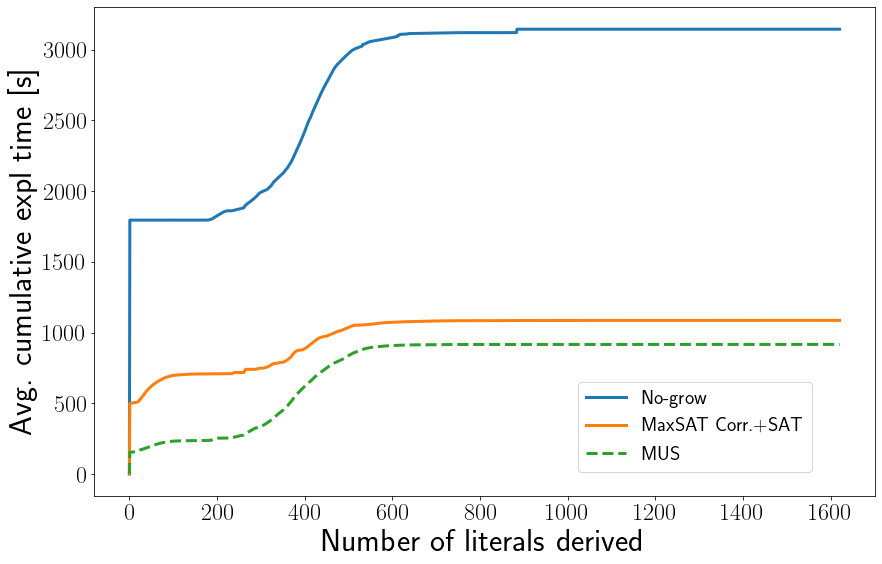

saving to path= /home/emilio/research/holygrail/latex/journal/jair21/figures/rq2_grow_OUS_INCREMENTAL_NAIVE_PARALLEL_2022_04_05.pdf


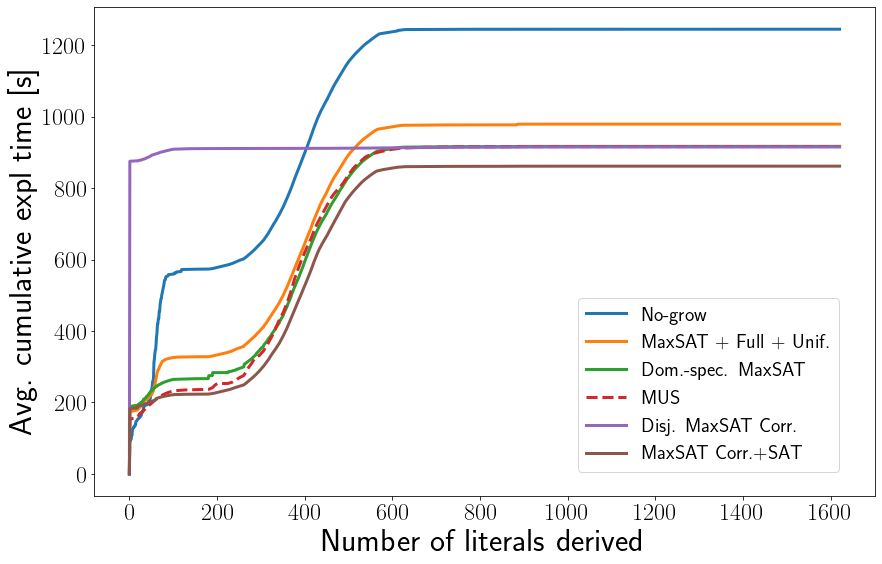

saving to path= /home/emilio/research/holygrail/latex/journal/jair21/figures/rq2_grow_OCUS_2022_04_05.pdf


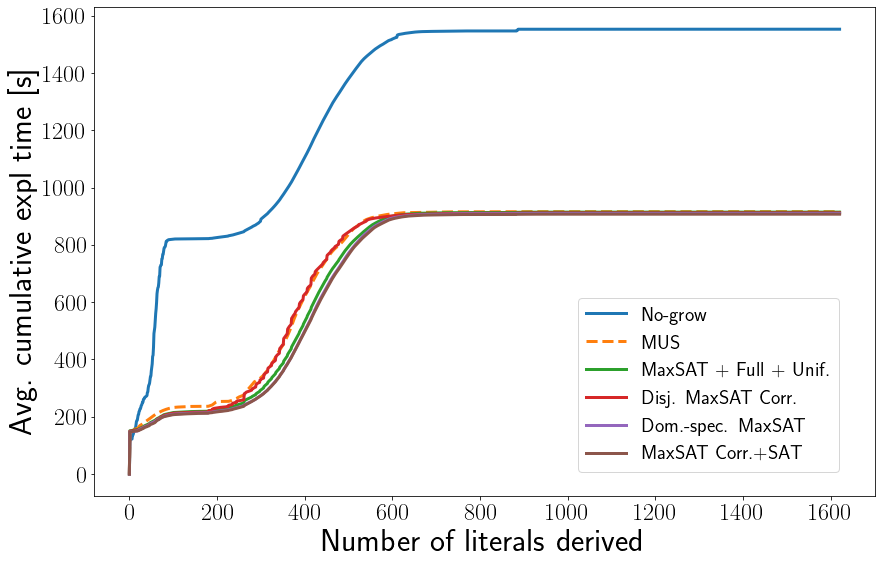

saving to path= /home/emilio/research/holygrail/latex/journal/jair21/figures/rq2_grow_OUS_NAIVE_PARALLEL_2022_04_05.pdf


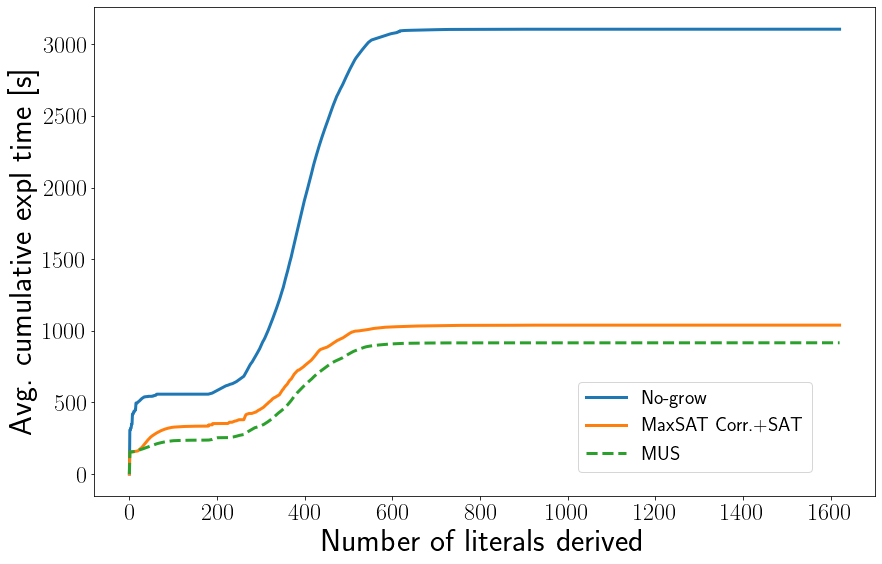

saving to path= /home/emilio/research/holygrail/latex/journal/jair21/figures/rq2_grow_OUS_INCREMENTAL_NAIVE_2022_04_05.pdf


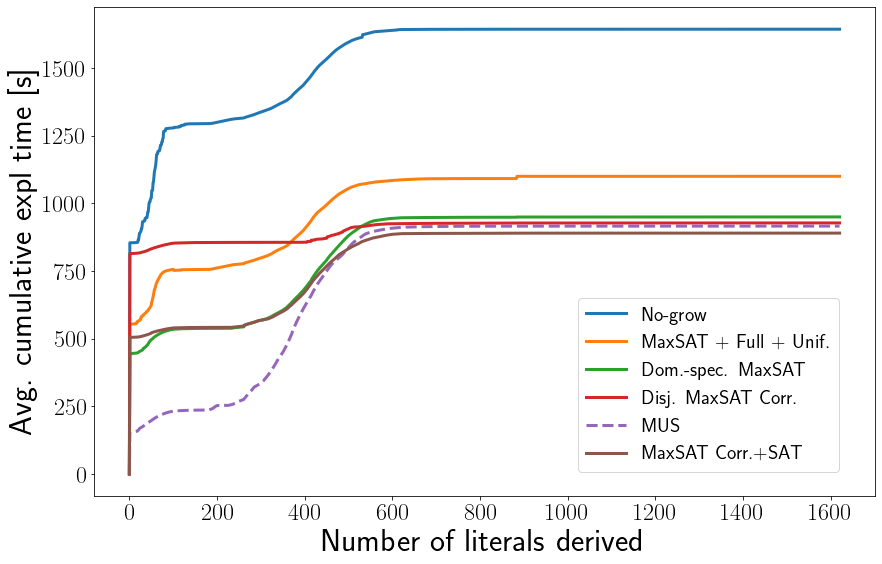

saving to path= /home/emilio/research/holygrail/latex/journal/jair21/figures/rq2_grow_OCUS_NOT_INCREMENTAL_2022_04_05.pdf


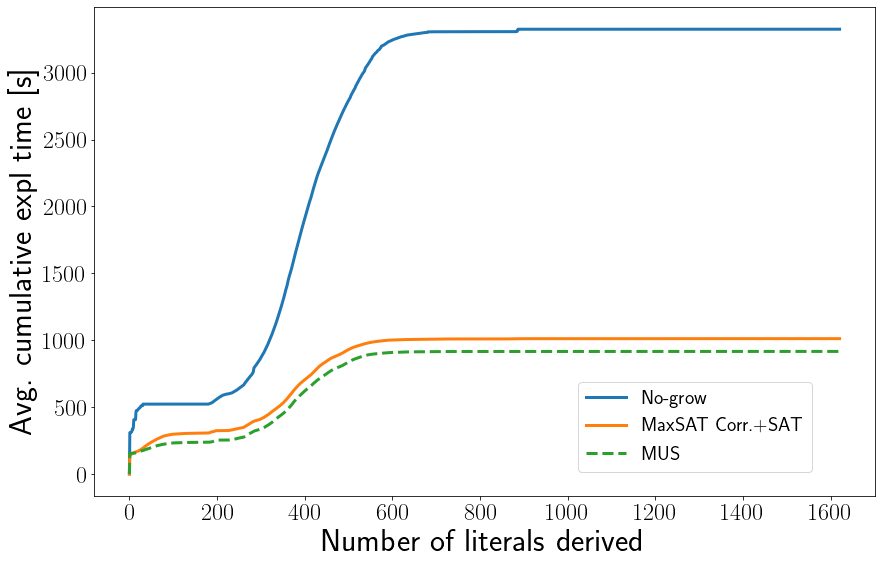

In [15]:

selected_columns = [
    'params_instance',
    'params_full_explanation_config',
    'params_explanation_computer',
    'params_explanation_config',
    'params_grow_config',
    'params_maxsatpolarity',
    'params_grow',
    'params_interpretation',
    'explanation config',
    #'params_reuse_SSes',
    #'params_sort_literals',
    'tot_time_explain',
    'lits_derived',
    'tot_lits_derived',
    'params_output',
    'average_lits_derived_time',
    'time_explain',
    'time_cumul_explain',
    'time_timedout',
    'tot_n_opt',
    'tot_n_sat',
    'tot_n_grow',
    'tot_n_hs',
    'tot_time_opt',
    'tot_time_grow',
    'tot_time_sat',
    '%time_opt2',
    '%time_sat2',
    '%time_grow2',
    '%time_remaining2',
    '%time_disj_mcs2'
]

df_mus_enhanced = df_mus[selected_columns]
display(set(df_mus["params_grow_config"]))

df_all_grows_enhanced = df_all_grows[selected_columns]

df_all_grows_enhanced = df_all_grows_enhanced[
    # NO-grow
    (~(df_all_grows_enhanced["params_grow"].isin(["DISABLED", "ignore"]))) &
    # MaxSAT Full == Actual for 
    # Disj mcs ignore with full interpretation
    (~((df_all_grows_enhanced["params_grow"] == "DISJ_MCS") & (df_all_grows_enhanced["params_interpretation"] == "FULL"))) &
    (~((df_all_grows_enhanced["params_grow"] == "CORR_GREEDY") & (df_all_grows_enhanced["params_interpretation"] == "FULL"))) 
]

df_mus_all_grows = df_mus_enhanced.append(df_all_grows_enhanced)

grow_renamed = {
    'SAT': 'No-grow', 
    'MaxSAT + Actual + Unif.': 'Dom.-spec. MaxSAT', 
    'Disj.MCSes + Actual + Unif.': 'Disj. MaxSAT Corr.', 
    'Greedy MCSes + Actual + Unif.': 'MaxSAT Corr.+SAT'
}

# print(set(df_mus_all_grows["params_explanation_computer"]))
for expl_config in set(df_mus_all_grows["params_explanation_computer"]):
    if expl_config =="MUS":
        continue
    df_expl_config = df_mus_all_grows[
        df_mus_all_grows["params_explanation_computer"].isin([expl_config, "MUS"])
    ]
    
    d_cumul_avg_time_incr, ordering = summarize_cumalitve_lits_derived_time(df_expl_config, column_name="params_grow_config", ignored=[])
    plot_derived_lits_avg_time(
        d_cumul_avg_time_incr, 
        ordering=ordering,
        mapping=grow_renamed,
        figsize=(14, 9), 
        #with_line = 3600,
        #ylim = (0, 400),
        loc=(0.62, 0.05),
        #next_to_graph=True,
        figure_path=PATH_FIGURES_POST_PAPER / datetime.now().strftime(f"rq2_grow_{expl_config}_%Y_%m_%d.pdf"),
    )

# Analyzing the runtime of different parts of the O(C)US incremnetal implementations

## Counting the number of timedout instances

In [16]:
df_timedout = df_mus_all_grows[
    (df_mus_all_grows["params_grow_config"].isin(["Greedy MCSes + Actual + Unif."])) & 
    (df_mus_all_grows["explanation config"].isin(['OCUS', 'OUSb', 'OUS Iter.'])) & 
    (df_mus_all_grows["time_timedout"] == 1) & 
    (df_mus_all_grows["params_instance"].str.contains('binairo_binairo_100_40.param.json'))
]

display(df_timedout['params_output'].to_list())

[]

In [17]:
all_non_timeout_instances = set(df_mus_all_grows[
    (df_mus_all_grows["params_grow_config"].isin(["Greedy MCSes + Actual + Unif.", "MUS"])) & 
    (df_mus_all_grows["time_timedout"] == 0)
]["params_instance"])

In [18]:
all_instances = df_mus_all_grows[
    (df_mus_all_grows["params_grow_config"].isin(["Greedy MCSes + Actual + Unif.", "MUS"]))
].groupby(by=["params_instance"]).sum().reset_index()

all_non_timeout_instances = all_instances[all_instances["time_timedout"] == 0]["params_instance"]

In [19]:
all_non_timeout_instances.to_list()

['binairo_binairo_100_40.param.json',
 'binairo_binairo_101_34.param.json',
 'binairo_binairo_102_10.param.json',
 'binairo_binairo_103_12.param.json',
 'binairo_binairo_104_36.param.json',
 'binairo_binairo_105_32.param.json',
 'binairo_binairo_106_16.param.json',
 'binairo_binairo_107_8.param.json',
 'binairo_binairo_108_14.param.json',
 'binairo_binairo_109_29.param.json',
 'binairo_binairo_10_48.param.json',
 'binairo_binairo_110_48.param.json',
 'binairo_binairo_111_30.param.json',
 'binairo_binairo_112_13.param.json',
 'binairo_binairo_113_37.param.json',
 'binairo_binairo_114_35.param.json',
 'binairo_binairo_115_11.param.json',
 'binairo_binairo_116_28.param.json',
 'binairo_binairo_117_50.param.json',
 'binairo_binairo_118_15.param.json',
 'binairo_binairo_119_31.param.json',
 'binairo_binairo_11_30.param.json',
 'binairo_binairo_120_49.param.json',
 'binairo_binairo_121_33.param.json',
 'binairo_binairo_122_9.param.json',
 'binairo_binairo_123_17.param.json',
 'binairo_binair

In [20]:
df_mus_all_grows_selected = df_mus_all_grows[
    (df_mus_all_grows["params_grow_config"].isin(["Greedy MCSes + Actual + Unif.", "MUS"])) & 
    (df_mus_all_grows["params_instance"].isin(all_non_timeout_instances))
]

## df_corr_selected
display(df_mus_all_grows_selected.groupby(by=["params_explanation_computer","params_grow_config"]).count())

df_corr_selected_grouped = df_mus_all_grows_selected.groupby(by=["params_explanation_computer", "params_grow_config"]).agg(
    t=("tot_time_explain" , lambda x: round(mean_ignore_zeros(x), 2)),
    f=("time_timedout", lambda x: f"[{str(len(x) - np.sum(x)).zfill(3)} / {len(x)}]"),
    avg_opt=("%time_opt2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_opt=("%time_opt2" , lambda x: round(np.std(x), 2)),
    avg_sat=("%time_sat2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_sat=("%time_sat2" ,lambda x: round(np.std(x), 2)),
    avg_grow=("%time_grow2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_grow=("%time_grow2" , lambda x: round(np.std(x), 2)),
    avg_disj_mcs=("%time_disj_mcs2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_disj_mcs=("%time_disj_mcs2" , lambda x: round(np.std(x), 2)),
    avg_remaining=("%time_remaining2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_remaining=("%time_remaining2" , lambda x: round(np.std(x), 2)),
    sum_t_opt=("tot_time_opt" , lambda x: sum(x)),
    sum_t_sat=("tot_time_sat" , lambda x: sum(x)),
    sum_t_grow=("tot_time_grow" , lambda x: sum(x)),
    avg_n_opt=("tot_n_opt" , lambda x: round(mean_ignore_zeros(x))),
    avg_n_sat=("tot_n_sat" , lambda x: round(mean_ignore_zeros(x))),
    avg_n_grow=("tot_n_grow" , lambda x: round(mean_ignore_zeros(x))),
    tot_n_opt=("tot_n_opt" , lambda x: sum(x)),
    tot_n_sat=("tot_n_sat" , lambda x: sum(x)),
    tot_n_grow=("tot_n_grow" , lambda x: sum(x)),
    avg_n_hs=("tot_n_hs" , lambda x: round(mean_ignore_zeros(x))),
    cnt = ("time_timedout", "count")
)

df_temp = df_corr_selected_grouped.reset_index()
for k in ["opt", "sat", "grow", "disj_mcs", "remaining"]:
    df_temp[k] = df_temp.apply(lambda row: None, axis=1)
    df_temp["%"+k] = df_temp.apply(lambda row: None, axis=1)

df_temp["avg_t_opt"] = df_temp.apply(
    lambda row: round(row["sum_t_opt"]/row['tot_n_opt'], 4) if row["tot_n_opt"] !=0 else 0, axis=1)
df_temp["avg_t_sat"] = df_temp.apply(
    lambda row: round(row['sum_t_sat']/row['tot_n_sat']  if row["tot_n_sat"] !=0 else 0, 4), axis=1)
df_temp["avg_t_grow"] = df_temp.apply(
    lambda row: round(row['sum_t_grow']/row['tot_n_grow']  if row["tot_n_grow"] !=0 else 0, 4), axis=1)

for index,row in df_temp.iterrows():
    for k in ["opt", "sat", "grow", "disj_mcs", "remaining"]:
        df_temp.at[index,k]= f'{row["avg_"+k]}% [+/- {row["std_"+k]}%]'
        df_temp.at[index,"%"+k]= f'{row["avg_"+k]}%'

renaming_expl_config = {
    "MUS": "MUS",
    "OCUS":"OCUS+Incr. HS",
    "OCUS_NOT_INCREMENTAL":"OCUS",
    "OUS_INCREMENTAL_NAIVE":"OUSb+Lit. Incr. HS",
    "OUS_INCREMENTAL_NAIVE_PARALLEL": "OUS Iter.+Lit. Incr. HS",
    "OUS_NAIVE_PARALLEL":"OUS Iter.",
    "OUS_SS": "OUSb"
}
        
df_temp["expl_config"] = df_temp.apply(
    lambda row: renaming_expl_config[row['params_explanation_computer']], axis=1)

percentage_exec_time_ous = df_temp[
        df_temp["expl_config"] != "bla"
    ][
    ["expl_config",#'params_grow_config',
     "t",
     "f",
     "%opt", 
     "%sat", 
     #"%grow", 
     "%disj_mcs",
     #"%remaining",
     "avg_n_hs"
     #'avg_t_opt', 
     #'avg_n_opt', 
     #'avg_t_sat',
     #'avg_n_sat', 
     #'avg_t_grow',
     #'avg_n_grow'
    ]].sort_values(["avg_n_hs"], ascending=[False])
display(percentage_exec_time_ous)
print(percentage_exec_time_ous.to_latex(index=False))

# df_sat_ignored_instances.groupby(by=["params_explanation_computer"]).sum()

,,params_instance,params_full_explanation_config,params_explanation_config,params_maxsatpolarity,params_grow,params_interpretation,explanation config,tot_time_explain,lits_derived,tot_lits_derived,...,tot_n_grow,tot_n_hs,tot_time_opt,tot_time_grow,tot_time_sat,%time_opt2,%time_sat2,%time_grow2,%time_remaining2,%time_disj_mcs2
params_explanation_computer,params_grow_config,,,,,,,,,,,,,,,,,,,,,
MUS,MUS,308,308,308,308,308,308,308,308,308,308,...,308,308,308,308,308,308,308,308,308,308
OCUS,Greedy MCSes + Actual + Unif.,308,308,308,308,308,308,308,308,308,308,...,308,308,308,308,308,308,308,308,308,308
OCUS_NOT_INCREMENTAL,Greedy MCSes + Actual + Unif.,308,308,308,308,308,308,308,308,308,308,...,308,308,308,308,308,308,308,308,308,308
OUS_INCREMENTAL_NAIVE,Greedy MCSes + Actual + Unif.,308,308,308,308,308,308,308,308,308,308,...,308,308,308,308,308,308,308,308,308,308
OUS_INCREMENTAL_NAIVE_PARALLEL,Greedy MCSes + Actual + Unif.,308,308,308,308,308,308,308,308,308,308,...,308,308,308,308,308,308,308,308,308,308
OUS_NAIVE_PARALLEL,Greedy MCSes + Actual + Unif.,308,308,308,308,308,308,308,308,308,308,...,308,308,308,308,308,308,308,308,308,308
OUS_SS,Greedy MCSes + Actual + Unif.,308,308,308,308,308,308,308,308,308,308,...,308,308,308,308,308,308,308,308,308,308


,expl_config,t,f,%opt,%sat,%disj_mcs,avg_n_hs
6,OUSb,309.30,[308 / 308],7.61%,1.34%,91.05%,25149
5,OUS Iter.,259.87,[308 / 308],9.98%,0.89%,89.13%,23867
2,OCUS,228.30,[308 / 308],19.95%,0.83%,79.22%,3034
4,OUS Iter.+Lit. Incr. HS,48.33,[308 / 308],37.15%,0.83%,62.02%,1233
3,OUSb+Lit. Incr. HS,73.54,[308 / 308],41.54%,2.91%,55.55%,1206
1,OCUS+Incr. HS,103.85,[308 / 308],50.88%,0.67%,48.45%,315
0,MUS,121.90,[308 / 308],0.0%,0.0%,0.0%,0


\begin{tabular}{lrllllr}
\toprule
            expl\_config &      t &           f &   \%opt &  \%sat & \%disj\_mcs &  avg\_n\_hs \\
\midrule
                   OUSb & 309.30 & [308 / 308] &  7.61\% & 1.34\% &    91.05\% &     25149 \\
              OUS Iter. & 259.87 & [308 / 308] &  9.98\% & 0.89\% &    89.13\% &     23867 \\
                   OCUS & 228.30 & [308 / 308] & 19.95\% & 0.83\% &    79.22\% &      3034 \\
OUS Iter.+Lit. Incr. HS &  48.33 & [308 / 308] & 37.15\% & 0.83\% &    62.02\% &      1233 \\
     OUSb+Lit. Incr. HS &  73.54 & [308 / 308] & 41.54\% & 2.91\% &    55.55\% &      1206 \\
          OCUS+Incr. HS & 103.85 & [308 / 308] & 50.88\% & 0.67\% &    48.45\% &       315 \\
                    MUS & 121.90 & [308 / 308] &   0.0\% &  0.0\% &      0.0\% &         0 \\
\bottomrule
\end{tabular}



In [21]:
set(df_mus_all_grows["params_grow_config"])

{'Disj.MCSes + Actual + Unif.',
 'Greedy MCSes + Actual + Unif.',
 'MUS',
 'MaxSAT + Actual + Unif.',
 'MaxSAT + Full + Unif.',
 'SAT'}

In [22]:
df_mus_all_grows_selected = df_mus_all_grows[
    (df_mus_all_grows["params_grow_config"].isin(['SAT', "MUS"]))
]

## df_corr_selected
display(df_mus_all_grows_selected.groupby(by=["params_explanation_computer","params_grow_config"]).count())

df_corr_selected_grouped = df_mus_all_grows_selected.groupby(by=["params_explanation_computer", "params_grow_config"]).agg(
    t=("tot_time_explain" , lambda x: round(mean_ignore_zeros(x), 2)),
    f=("time_timedout", lambda x: f"[{str(len(x) - np.sum(x)).zfill(3)} / {len(x)}]"),
    avg_opt=("%time_opt2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_opt=("%time_opt2" , lambda x: round(np.std(x), 2)),
    avg_sat=("%time_sat2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_sat=("%time_sat2" ,lambda x: round(np.std(x), 2)),
    avg_grow=("%time_grow2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_grow=("%time_grow2" , lambda x: round(np.std(x), 2)),
    avg_disj_mcs=("%time_disj_mcs2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_disj_mcs=("%time_disj_mcs2" , lambda x: round(np.std(x), 2)),
    avg_remaining=("%time_remaining2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_remaining=("%time_remaining2" , lambda x: round(np.std(x), 2)),
    sum_t_opt=("tot_time_opt" , lambda x: sum(x)),
    sum_t_sat=("tot_time_sat" , lambda x: sum(x)),
    sum_t_grow=("tot_time_grow" , lambda x: sum(x)),
    avg_n_opt=("tot_n_opt" , lambda x: round(mean_ignore_zeros(x))),
    avg_n_sat=("tot_n_sat" , lambda x: round(mean_ignore_zeros(x))),
    avg_n_grow=("tot_n_grow" , lambda x: round(mean_ignore_zeros(x))),
    tot_n_opt=("tot_n_opt" , lambda x: sum(x)),
    tot_n_sat=("tot_n_sat" , lambda x: sum(x)),
    tot_n_grow=("tot_n_grow" , lambda x: sum(x)),
    avg_n_hs=("tot_n_hs" , lambda x: round(mean_ignore_zeros(x))),
    cnt = ("time_timedout", "count")
)

df_temp = df_corr_selected_grouped.reset_index()
for k in ["opt", "sat", "grow", "disj_mcs", "remaining"]:
    df_temp[k] = df_temp.apply(lambda row: None, axis=1)
    df_temp["%"+k] = df_temp.apply(lambda row: None, axis=1)

df_temp["avg_t_opt"] = df_temp.apply(
    lambda row: round(row["sum_t_opt"]/row['tot_n_opt'], 4) if row["tot_n_opt"] !=0 else 0, axis=1)
df_temp["avg_t_sat"] = df_temp.apply(
    lambda row: round(row['sum_t_sat']/row['tot_n_sat']  if row["tot_n_sat"] !=0 else 0, 4), axis=1)
df_temp["avg_t_grow"] = df_temp.apply(
    lambda row: round(row['sum_t_grow']/row['tot_n_grow']  if row["tot_n_grow"] !=0 else 0, 4), axis=1)

for index,row in df_temp.iterrows():
    for k in ["opt", "sat", "grow", "disj_mcs", "remaining"]:
        df_temp.at[index,k]= f'{row["avg_"+k]}% [+/- {row["std_"+k]}%]'
        df_temp.at[index,"%"+k]= f'{row["avg_"+k]}%'

renaming_expl_config = {
    "MUS": "MUS",
    "OCUS":"OCUS+Incr. HS",
    "OCUS_NOT_INCREMENTAL":"OCUS",
    "OUS_INCREMENTAL_NAIVE":"OUSb+Lit. Incr. HS",
    "OUS_INCREMENTAL_NAIVE_PARALLEL": "OUS Iter.+Lit. Incr. HS",
    "OUS_NAIVE_PARALLEL":"OUS Iter.",
    "OUS_SS": "OUSb"
}
        
df_temp["expl_config"] = df_temp.apply(
    lambda row: renaming_expl_config[row['params_explanation_computer']], axis=1)

percentage_exec_time_ous = df_temp[
        df_temp["expl_config"] != "bla"
    ][
    ["expl_config",#'params_grow_config',
     #"t",
     "f",
     "%opt", 
     "%sat", 
     #"%grow", 
     "%disj_mcs",
     #"%remaining",
     "avg_n_hs"
     #'avg_t_opt', 
     #'avg_n_opt', 
     #'avg_t_sat',
     #'avg_n_sat', 
     #'avg_t_grow',
     #'avg_n_grow'
    ]].sort_values(["avg_n_hs"], ascending=[False])
display(percentage_exec_time_ous)
print(percentage_exec_time_ous.to_latex(index=False))

# df_sat_ignored_instances.groupby(by=["params_explanation_computer"]).sum()

,,params_instance,params_full_explanation_config,params_explanation_config,params_maxsatpolarity,params_grow,params_interpretation,explanation config,tot_time_explain,lits_derived,tot_lits_derived,...,tot_n_grow,tot_n_hs,tot_time_opt,tot_time_grow,tot_time_sat,%time_opt2,%time_sat2,%time_grow2,%time_remaining2,%time_disj_mcs2
params_explanation_computer,params_grow_config,,,,,,,,,,,,,,,,,,,,,
MUS,MUS,403,403,403,403,403,403,403,403,403,403,...,403,403,403,403,403,403,403,403,403,403
OCUS,SAT,403,403,403,403,403,403,403,403,403,403,...,403,403,403,403,403,403,403,403,403,403
OCUS_NOT_INCREMENTAL,SAT,108,108,108,108,108,108,108,108,108,108,...,108,108,108,108,108,108,108,108,108,108
OUS_INCREMENTAL_NAIVE,SAT,403,403,403,403,403,403,403,403,403,403,...,403,403,403,403,403,403,403,403,403,403
OUS_INCREMENTAL_NAIVE_PARALLEL,SAT,403,403,403,403,403,403,403,403,403,403,...,403,403,403,403,403,403,403,403,403,403
OUS_NAIVE_PARALLEL,SAT,108,108,108,108,108,108,108,108,108,108,...,108,108,108,108,108,108,108,108,108,108
OUS_SS,SAT,108,108,108,108,108,108,108,108,108,108,...,108,108,108,108,108,108,108,108,108,108


,expl_config,f,%opt,%sat,%disj_mcs,avg_n_hs
6,OUSb,[015 / 108],89.33%,9.92%,0.0%,42329
5,OUS Iter.,[016 / 108],86.56%,11.52%,0.0%,22704
2,OCUS,[011 / 108],92.62%,6.27%,0.0%,14983
4,OUS Iter.+Lit. Incr. HS,[272 / 403],94.61%,4.75%,0.0%,2195
3,OUSb+Lit. Incr. HS,[233 / 403],96.96%,3.79%,0.0%,1773
1,OCUS+Incr. HS,[240 / 403],97.77%,2.05%,0.0%,498
0,MUS,[311 / 403],0.0%,0.0%,0.0%,0


\begin{tabular}{lllllr}
\toprule
            expl\_config &           f &   \%opt &   \%sat & \%disj\_mcs &  avg\_n\_hs \\
\midrule
                   OUSb & [015 / 108] & 89.33\% &  9.92\% &      0.0\% &     42329 \\
              OUS Iter. & [016 / 108] & 86.56\% & 11.52\% &      0.0\% &     22704 \\
                   OCUS & [011 / 108] & 92.62\% &  6.27\% &      0.0\% &     14983 \\
OUS Iter.+Lit. Incr. HS & [272 / 403] & 94.61\% &  4.75\% &      0.0\% &      2195 \\
     OUSb+Lit. Incr. HS & [233 / 403] & 96.96\% &  3.79\% &      0.0\% &      1773 \\
          OCUS+Incr. HS & [240 / 403] & 97.77\% &  2.05\% &      0.0\% &       498 \\
                    MUS & [311 / 403] &   0.0\% &   0.0\% &      0.0\% &         0 \\
\bottomrule
\end{tabular}



In [23]:
df_corr_selected_grouped = df_corr_selected.groupby(by=["params_instance"]).sum()
df_corr_non_timedout_instances = df_corr_selected_grouped[df_corr_selected_grouped["time_timedout"] == 0].reset_index()
non_timedout_instances = df_corr_non_timedout_instances.params_instance.to_list()

df_corr_non_timedout_instances = df_corr_selected[
    df_corr_selected["params_instance"].isin(non_timedout_instances)
]

NameError: name 'df_corr_selected' is not defined

In [ ]:
df_corr_selected = df_mus_all_grows[
    (df_mus_all_grows["params_grow_config"].isin(["Greedy MCSes + Actual + Unif.", "MUS"])) & 
    (df_mus_all_grows["time_timedout"] == 0)
]

## df_corr_selected


df_corr_selected_grouped = df_corr_selected.groupby(by=["params_explanation_computer", "params_grow_config"]).agg(
    t=("tot_time_explain" , lambda x: round(mean_ignore_zeros(x), 2)),
    f=("time_timedout", lambda x: f"[{str(len(x) - np.sum(x)).zfill(3)} / {len(x)}]"),
    avg_opt=("%time_opt2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_opt=("%time_opt2" , lambda x: round(np.std(x), 2)),
    avg_sat=("%time_sat2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_sat=("%time_sat2" ,lambda x: round(np.std(x), 2)),
    avg_grow=("%time_grow2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_grow=("%time_grow2" , lambda x: round(np.std(x), 2)),
    avg_disj_mcs=("%time_disj_mcs2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_disj_mcs=("%time_disj_mcs2" , lambda x: round(np.std(x), 2)),
    avg_remaining=("%time_remaining2" , lambda x: round(mean_ignore_zeros(x), 2)),
    std_remaining=("%time_remaining2" , lambda x: round(np.std(x), 2)),
    sum_t_opt=("tot_time_opt" , lambda x: sum(x)),
    sum_t_sat=("tot_time_sat" , lambda x: sum(x)),
    sum_t_grow=("tot_time_grow" , lambda x: sum(x)),
    avg_n_opt=("tot_n_opt" , lambda x: round(mean_ignore_zeros(x))),
    avg_n_sat=("tot_n_sat" , lambda x: round(mean_ignore_zeros(x))),
    avg_n_grow=("tot_n_grow" , lambda x: round(mean_ignore_zeros(x))),
    tot_n_opt=("tot_n_opt" , lambda x: sum(x)),
    tot_n_sat=("tot_n_sat" , lambda x: sum(x)),
    tot_n_grow=("tot_n_grow" , lambda x: sum(x)),
    avg_n_hs=("tot_n_hs" , lambda x: round(mean_ignore_zeros(x))),
    cnt = ("time_timedout", "count")
)

df_temp = df_corr_selected_grouped.reset_index()
for k in ["opt", "sat", "grow", "disj_mcs", "remaining"]:
    df_temp[k] = df_temp.apply(lambda row: None, axis=1)
    df_temp["%"+k] = df_temp.apply(lambda row: None, axis=1)

df_temp["avg_t_opt"] = df_temp.apply(
    lambda row: round(row["sum_t_opt"]/row['tot_n_opt'], 4) if row["tot_n_opt"] !=0 else 0, axis=1)
df_temp["avg_t_sat"] = df_temp.apply(
    lambda row: round(row['sum_t_sat']/row['tot_n_sat']  if row["tot_n_sat"] !=0 else 0, 4), axis=1)
df_temp["avg_t_grow"] = df_temp.apply(
    lambda row: round(row['sum_t_grow']/row['tot_n_grow']  if row["tot_n_grow"] !=0 else 0, 4), axis=1)

for index,row in df_temp.iterrows():
    for k in ["opt", "sat", "grow", "disj_mcs", "remaining"]:
        df_temp.at[index,k]= f'{row["avg_"+k]}% [+/- {row["std_"+k]}%]'
        df_temp.at[index,"%"+k]= f'{row["avg_"+k]}%'

renaming_expl_config = {
    "MUS": "MUS",
    "OCUS":"OCUS+Incr. HS",
    "OCUS_NOT_INCREMENTAL":"OCUS",
    "OUS_INCREMENTAL_NAIVE":"OUSb+Lit. Incr. HS",
    "OUS_INCREMENTAL_NAIVE_PARALLEL": "OUS Iter.+Lit. Incr. HS",
    "OUS_NAIVE_PARALLEL":"OUS Iter.",
    "OUS_SS": "OUSb"
}
        
df_temp["expl_config"] = df_temp.apply(
    lambda row: renaming_expl_config[row['params_explanation_computer']], axis=1)

percentage_exec_time_ous = df_temp[
        df_temp["expl_config"] != "bla"
    ][
    ["expl_config",#'params_grow_config',
     #"t",
     "f",
     "%opt", 
     "%sat", 
     #"%grow", 
     "%disj_mcs",
     #"%remaining",
     "avg_n_hs"
     #'avg_t_opt', 
     #'avg_n_opt', 
     #'avg_t_sat',
     #'avg_n_sat', 
     #'avg_t_grow',
     #'avg_n_grow'
    ]].sort_values(["avg_n_hs"], ascending=[False])
display(percentage_exec_time_ous)
print(percentage_exec_time_ous.to_latex(index=False))

# df_sat_ignored_instances.groupby(by=["params_explanation_computer"]).sum()

In [ ]:
# library & dataset
import seaborn as sns
width= 0.6

df_sat_non_timeout_instances = df_corr_non_timedout_instances[
        (~df_corr_non_timedout_instances["explanation config"].str.contains("MUS"))
]

incr = df_sat_non_timeout_instances[df_sat_non_timeout_instances["explanation config"].str.contains("Incr")]
non_incr = df_sat_non_timeout_instances[
    (~df_sat_non_timeout_instances["explanation config"].str.contains("Incr")) &
        (~df_sat_non_timeout_instances["explanation config"].str.contains("MUS"))
]

plt.figure(figsize=(13,8))
ax = sns.boxplot( x=df_sat_non_timeout_instances["explanation config"], y=df_sat_non_timeout_instances["HS"], width=width )
plt.setp(ax.get_xticklabels(), rotation=45)
plt.savefig(PATH_FIGURES_POST_PAPER / datetime.now().strftime(f"rq3_hittingsets_r_%Y_%m_%d.pdf"))

plt.figure() # this clears the figure
ax = sns.boxplot( x=incr["explanation config"], y=incr["HS"], width=width)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.savefig(PATH_FIGURES_POST_PAPER / datetime.now().strftime(f"rq3_hittingsets_incremental_r_%Y_%m_%d.pdf"))

plt.figure() # this clears the figure
ax = sns.boxplot( x=non_incr["explanation config"], y=non_incr["HS"], width=width)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.savefig(PATH_FIGURES_POST_PAPER / datetime.now().strftime(f"rq3_hittingsets_not_incremental_R_%Y_%m_%d.pdf"))


plt.figure(figsize=(13,8))
sns.boxplot( y=df_sat_non_timeout_instances["explanation config"], x=df_sat_non_timeout_instances["HS"], width=0.7, orient="h", )
plt.savefig(PATH_FIGURES_POST_PAPER / datetime.now().strftime(f"rq3_hittingsets_incremental_%Y_%m_%d.pdf"))

plt.figure() # this clears the figure
sns.boxplot( y=incr["explanation config"], x=incr["HS"], width=0.7, orient="h", )
plt.savefig(PATH_FIGURES_POST_PAPER / datetime.now().strftime(f"rq3_hittingsets_incremental_%Y_%m_%d.pdf"))

plt.figure() # this clears the figure
sns.boxplot( y=non_incr["explanation config"], x=non_incr["HS"], width=0.7, orient="h" )
plt.savefig(PATH_FIGURES_POST_PAPER / datetime.now().strftime(f"rq3_hittingsets_not_incremental_%Y_%m_%d.pdf"))